In [4]:
!pip install -r requirements.txt

    pyarrow>=4.0.*
           ~~~~~~^


# Analysis of Australian Housing Prices by Capital Cities from 2002-2024

### By Dhruv Agrawal z5361800

### Contents

### Contents

- Background on Australian housing
- Visualising increase housing prices over time
- Comparing the increase in housing prices to the CPI
- Comparing housing prices across states in 2024
- Comparing housing prices across states since 2002

### Background

### Background

Australia has some of the most unaffordable housing in the world. According to the International Housing Affordability report from Demographia in 2024 which analysed 94 housing markets across Australia, Canada, China, Ireland, New Zealand,
Singapore, United Kingdom and the United States,

1. The Sydney and Melbourne housing markets were classified as "impossibly unaffordable" in 2024
2. Sydney was ranked the 2nd most unaffordable of the 94 housing markets.

In [5]:
import polars as pl
import plotnine as pn
import pyarrow as pa
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [6]:
import warnings
warnings.filterwarnings('ignore')

### Visualising increase in housing prices

In [7]:
housing_df: pl.DataFrame = pl.read_csv('housing_prices.csv')
housing_df

,Median Price of Established House Transfers (Unstratified) ; Sydney ;,Median Price of Established House Transfers (Unstratified) ; Rest of NSW ;,Median Price of Established House Transfers (Unstratified) ; Melbourne ;,Median Price of Established House Transfers (Unstratified) ; Rest of Vic. ;,Median Price of Established House Transfers (Unstratified) ; Brisbane ;,Median Price of Established House Transfers (Unstratified) ; Rest of Qld. ;,Median Price of Established House Transfers (Unstratified) ; Adelaide ;,Median Price of Established House Transfers (Unstratified) ; Rest of SA ;,Median Price of Established House Transfers (Unstratified) ; Perth ;,Median Price of Established House Transfers (Unstratified) ; Rest of WA ;,Median Price of Established House Transfers (Unstratified) ; Hobart ;,Median Price of Established House Transfers (Unstratified) ; Rest of Tas. ;,Median Price of Established House Transfers (Unstratified) ; Darwin ;,Median Price of Established House Transfers (Unstratified) ; Rest of NT ;,Median Price of Established House Transfers (Unstratified) ; Canberra ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Sydney ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of NSW ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Melbourne ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of Vic. ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Brisbane ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of Qld. ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Adelaide ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of SA ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Perth ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of WA ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Hobart ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of Tas. ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Darwin ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of NT ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Canberra ;,Number of Established House Transfers ; Sydney ;,Number of Established House Transfers ; Rest of NSW ;,Number of Established House Transfers ; Melbourne ;,Number of Established House Transfers ; Rest of Vic. ;,Number of Established House Transfers ; Brisbane ;,Number of Established House Transfers ; Rest of Qld. ;,Number of Established House Transfers ; Adelaide ;,Number of Established House Transfers ; Rest of SA ;,Number of Established House Transfers ; Perth ;,Number of Established House Transfers ; Rest of WA ;,Number of Established House Transfers ; Hobart ;,Number of Established House Transfers ; Rest of Tas. ;,Number of Established House Transfers ; Darwin ;,Number of Established House Transfers ; Rest of NT ;,Number of Established House Transfers ; Canberra ;,Number of Attached Dwelling Transfers ; Sydney ;,Number of Attached Dwelling Transfers ; Rest of NSW ;,Number of Attached Dwelling Transfers ; Melbourne ;,Number of Attached Dwelling Transfers ; Rest of Vic. ;,Number of Attached Dwelling Transfers ; Brisbane ;,Number of Attached Dwelling Transfers ; Rest of Qld. ;,Number of Attached Dwelling Transfers ; Adelaide ;,Number of Attached Dwelling Transfers ; Rest of SA ;,Number of Attached Dwelling Transfers ; Perth ;,Number of Attached Dwelling Transfers ; Rest of WA ;,Number of Attached Dwelling Transfers ; Hobart ;,Number of Attached Dwelling Transfers ; Rest of Tas. ;,Number of Attached Dwelling Transfers ; Darwin ;,Number of Attached Dwelling Transfers ; Rest of NT ;,Number of Attached Dwelling Transfers ; Canberra ;
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""Unit""",""

In [8]:
metadata_df = housing_df.slice(0, 9)
pricing_df = housing_df.slice(9, len(housing_df) - 9)

pricing_df

,Median Price of Established House Transfers (Unstratified) ; Sydney ;,Median Price of Established House Transfers (Unstratified) ; Rest of NSW ;,Median Price of Established House Transfers (Unstratified) ; Melbourne ;,Median Price of Established House Transfers (Unstratified) ; Rest of Vic. ;,Median Price of Established House Transfers (Unstratified) ; Brisbane ;,Median Price of Established House Transfers (Unstratified) ; Rest of Qld. ;,Median Price of Established House Transfers (Unstratified) ; Adelaide ;,Median Price of Established House Transfers (Unstratified) ; Rest of SA ;,Median Price of Established House Transfers (Unstratified) ; Perth ;,Median Price of Established House Transfers (Unstratified) ; Rest of WA ;,Median Price of Established House Transfers (Unstratified) ; Hobart ;,Median Price of Established House Transfers (Unstratified) ; Rest of Tas. ;,Median Price of Established House Transfers (Unstratified) ; Darwin ;,Median Price of Established House Transfers (Unstratified) ; Rest of NT ;,Median Price of Established House Transfers (Unstratified) ; Canberra ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Sydney ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of NSW ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Melbourne ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of Vic. ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Brisbane ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of Qld. ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Adelaide ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of SA ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Perth ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of WA ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Hobart ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of Tas. ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Darwin ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of NT ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Canberra ;,Number of Established House Transfers ; Sydney ;,Number of Established House Transfers ; Rest of NSW ;,Number of Established House Transfers ; Melbourne ;,Number of Established House Transfers ; Rest of Vic. ;,Number of Established House Transfers ; Brisbane ;,Number of Established House Transfers ; Rest of Qld. ;,Number of Established House Transfers ; Adelaide ;,Number of Established House Transfers ; Rest of SA ;,Number of Established House Transfers ; Perth ;,Number of Established House Transfers ; Rest of WA ;,Number of Established House Transfers ; Hobart ;,Number of Established House Transfers ; Rest of Tas. ;,Number of Established House Transfers ; Darwin ;,Number of Established House Transfers ; Rest of NT ;,Number of Established House Transfers ; Canberra ;,Number of Attached Dwelling Transfers ; Sydney ;,Number of Attached Dwelling Transfers ; Rest of NSW ;,Number of Attached Dwelling Transfers ; Melbourne ;,Number of Attached Dwelling Transfers ; Rest of Vic. ;,Number of Attached Dwelling Transfers ; Brisbane ;,Number of Attached Dwelling Transfers ; Rest of Qld. ;,Number of Attached Dwelling Transfers ; Adelaide ;,Number of Attached Dwelling Transfers ; Rest of SA ;,Number of Attached Dwelling Transfers ; Perth ;,Number of Attached Dwelling Transfers ; Rest of WA ;,Number of Attached Dwelling Transfers ; Hobart ;,Number of Attached Dwelling Transfers ; Rest of Tas. ;,Number of Attached Dwelling Transfers ; Darwin ;,Number of Attached Dwelling Transfers ; Rest of NT ;,Number of Attached Dwelling Transfers ; Canberra ;
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""Mar-2002""

In [9]:
pricing_df = pricing_df.rename({pricing_df.columns[0]: 'Date'})
pricing_df = pricing_df.with_columns(
    pl.col('Date').str.strptime(pl.Datetime, '%b-%Y')
)

pricing_df

Date,Median Price of Established House Transfers (Unstratified) ; Sydney ;,Median Price of Established House Transfers (Unstratified) ; Rest of NSW ;,Median Price of Established House Transfers (Unstratified) ; Melbourne ;,Median Price of Established House Transfers (Unstratified) ; Rest of Vic. ;,Median Price of Established House Transfers (Unstratified) ; Brisbane ;,Median Price of Established House Transfers (Unstratified) ; Rest of Qld. ;,Median Price of Established House Transfers (Unstratified) ; Adelaide ;,Median Price of Established House Transfers (Unstratified) ; Rest of SA ;,Median Price of Established House Transfers (Unstratified) ; Perth ;,Median Price of Established House Transfers (Unstratified) ; Rest of WA ;,Median Price of Established House Transfers (Unstratified) ; Hobart ;,Median Price of Established House Transfers (Unstratified) ; Rest of Tas. ;,Median Price of Established House Transfers (Unstratified) ; Darwin ;,Median Price of Established House Transfers (Unstratified) ; Rest of NT ;,Median Price of Established House Transfers (Unstratified) ; Canberra ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Sydney ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of NSW ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Melbourne ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of Vic. ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Brisbane ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of Qld. ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Adelaide ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of SA ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Perth ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of WA ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Hobart ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of Tas. ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Darwin ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Rest of NT ;,Median Price of Attached Dwelling Transfers (Unstratified) ; Canberra ;,Number of Established House Transfers ; Sydney ;,Number of Established House Transfers ; Rest of NSW ;,Number of Established House Transfers ; Melbourne ;,Number of Established House Transfers ; Rest of Vic. ;,Number of Established House Transfers ; Brisbane ;,Number of Established House Transfers ; Rest of Qld. ;,Number of Established House Transfers ; Adelaide ;,Number of Established House Transfers ; Rest of SA ;,Number of Established House Transfers ; Perth ;,Number of Established House Transfers ; Rest of WA ;,Number of Established House Transfers ; Hobart ;,Number of Established House Transfers ; Rest of Tas. ;,Number of Established House Transfers ; Darwin ;,Number of Established House Transfers ; Rest of NT ;,Number of Established House Transfers ; Canberra ;,Number of Attached Dwelling Transfers ; Sydney ;,Number of Attached Dwelling Transfers ; Rest of NSW ;,Number of Attached Dwelling Transfers ; Melbourne ;,Number of Attached Dwelling Transfers ; Rest of Vic. ;,Number of Attached Dwelling Transfers ; Brisbane ;,Number of Attached Dwelling Transfers ; Rest of Qld. ;,Number of Attached Dwelling Transfers ; Adelaide ;,Number of Attached Dwelling Transfers ; Rest of SA ;,Number of Attached Dwelling Transfers ; Perth ;,Number of Attached Dwelling Transfers ; Rest of WA ;,Number of Attached Dwelling Transfers ; Hobart ;,Number of Attached Dwelling Transfers ; Rest of Tas. ;,Number of Attached Dwelling Transfers ; Darwin ;,Number of Attached Dwelling Transfers ; Rest of NT ;,Number of Attached Dwelling Transfers ; Canberra ;
datetime[μs],str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str


In [10]:
median_prices_df = pricing_df.select([pricing_df.columns[0]] + [col_name for i, col_name in enumerate(pricing_df.columns) if i % 2 == 1 and i <= 15])
median_prices_df

Date,Median Price of Established House Transfers (Unstratified) ; Sydney ;,Median Price of Established House Transfers (Unstratified) ; Melbourne ;,Median Price of Established House Transfers (Unstratified) ; Brisbane ;,Median Price of Established House Transfers (Unstratified) ; Adelaide ;,Median Price of Established House Transfers (Unstratified) ; Perth ;,Median Price of Established House Transfers (Unstratified) ; Hobart ;,Median Price of Established House Transfers (Unstratified) ; Darwin ;,Median Price of Established House Transfers (Unstratified) ; Canberra ;
datetime[μs],str,str,str,str,str,str,str,str
2002-03-01 00:00:00,"""365.0""","""241.0""","""185.0""","""166.0""","""190.0""","""123.3""","""190.0""","""245.0"""
2002-06-01 00:00:00,"""393.5""","""260.0""","""182.6""","""175.0""","""190.0""","""117.0""","""188.3""","""258.0"""
2002-09-01 00:00:00,"""413.0""","""265.0""","""198.0""","""181.0""","""195.0""","""124.0""","""190.0""","""275.0"""
2002-12-01 00:00:00,"""444.0""","""280.0""","""208.0""","""195.0""","""206.0""","""128.0""","""195.0""","""291.0"""
2003-03-01 00:00:00,"""434.5""","""270.0""","""225.0""","""209.4""","""216.0""","""145.0""","""198.0""","""300.0"""
…,…,…,…,…,…,…,…,…
2023-03-01 00:00:00,"""1260.0""","""837.0""","""756.0""","""680.0""","""577.0""","""705.0""","""575.0""","""985.0"""
2023-06-01 00:00:00,"""1365.0""","""847.0""","""775.0""","""710.0""","""600.0""","""696.5""","""600.0""","""980.0"""
2023-09-01 00:00:00,"""1400.0""","""840.0""","""800.0""","""720.5""","""620.0""","""695.0""","""607.5""","""990.0"""


In [11]:
ORDERED_CITIES = ['sydney', 'melbourne', 'brisbane', 'adelaide', 'perth', 'hobart', 'darwin', 'canberra']
for i, city in enumerate(ORDERED_CITIES):
   median_prices_df = median_prices_df.rename({median_prices_df.columns[i + 1]: f'median_price_{city}'})
   median_prices_df = median_prices_df.with_columns(
      pl.col(f'median_price_{city}').cast(pl.Float32).fill_null(0)
   )

median_prices_df

Date,median_price_sydney,median_price_melbourne,median_price_brisbane,median_price_adelaide,median_price_perth,median_price_hobart,median_price_darwin,median_price_canberra
datetime[μs],f32,f32,f32,f32,f32,f32,f32,f32
2002-03-01 00:00:00,365.0,241.0,185.0,166.0,190.0,123.300003,190.0,245.0
2002-06-01 00:00:00,393.5,260.0,182.600006,175.0,190.0,117.0,188.300003,258.0
2002-09-01 00:00:00,413.0,265.0,198.0,181.0,195.0,124.0,190.0,275.0
2002-12-01 00:00:00,444.0,280.0,208.0,195.0,206.0,128.0,195.0,291.0
2003-03-01 00:00:00,434.5,270.0,225.0,209.399994,216.0,145.0,198.0,300.0
…,…,…,…,…,…,…,…,…
2023-03-01 00:00:00,1260.0,837.0,756.0,680.0,577.0,705.0,575.0,985.0
2023-06-01 00:00:00,1365.0,847.0,775.0,710.0,600.0,696.5,600.0,980.0
2023-09-01 00:00:00,1400.0,840.0,800.0,720.5,620.0,695.0,607.5,990.0


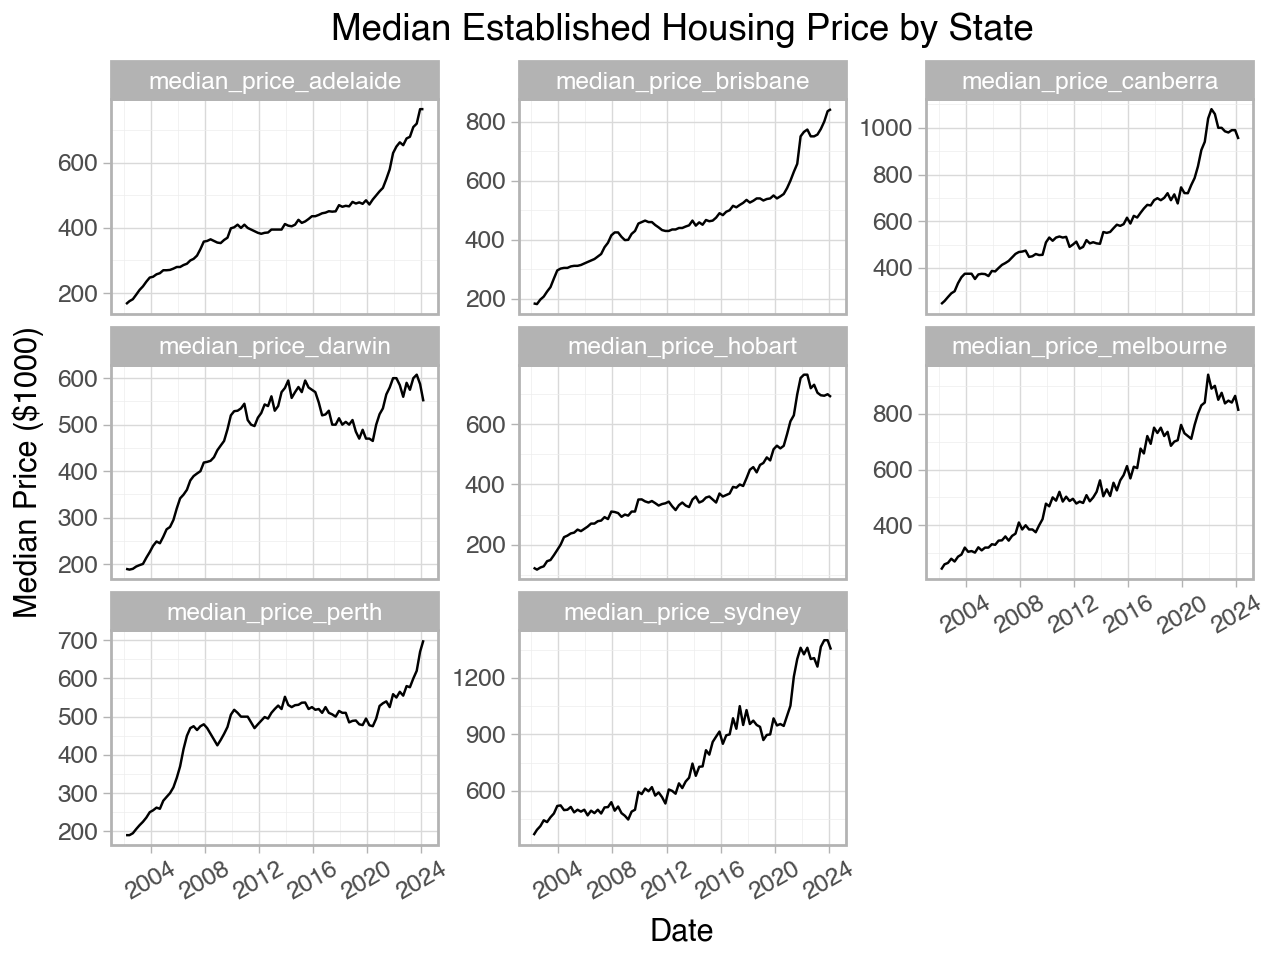

In [12]:
median_prices_melted_df = median_prices_df.melt(id_vars='Date', value_vars=median_prices_df.columns[1:], value_name='median_price', variable_name='city')

plot = (
    pn.ggplot(median_prices_melted_df, pn.aes(x='Date', y='median_price')) +
    pn.geom_line() +
    pn.facet_wrap('~city', scales='free_y') +
    pn.scale_x_datetime(date_breaks='4 years', date_labels='%Y') +
    pn.labs(title='Median Established Housing Price by State', x='Date', y='Median Price ($1000)') +
    pn.theme_light() +
    pn.theme(axis_text_x=pn.element_text(rotation=30))
)

plot.show()

### Visualising Sydney Prices against Consumer Price Index

In [13]:
cpi_raw_df = pl.read_csv('640103.csv')
cpi_raw_df

,Index Numbers ; Food and non-alcoholic beverages ; Sydney ;,Index Numbers ; Alcohol and tobacco ; Sydney ;,Index Numbers ; Clothing and footwear ; Sydney ;,Index Numbers ; Housing ; Sydney ;,"Index Numbers ; Furnishings, household equipment and services ; Sydney ;",Index Numbers ; Health ; Sydney ;,Index Numbers ; Transport ; Sydney ;,Index Numbers ; Communication ; Sydney ;,Index Numbers ; Recreation and culture ; Sydney ;,Index Numbers ; Education ; Sydney ;,Index Numbers ; Insurance and financial services ; Sydney ;,Index Numbers ; All groups CPI ; Sydney ;,Index Numbers ; Food and non-alcoholic beverages ; Melbourne ;,Index Numbers ; Alcohol and tobacco ; Melbourne ;,Index Numbers ; Clothing and footwear ; Melbourne ;,Index Numbers ; Housing ; Melbourne ;,"Index Numbers ; Furnishings, household equipment and services ; Melbourne ;",Index Numbers ; Health ; Melbourne ;,Index Numbers ; Transport ; Melbourne ;,Index Numbers ; Communication ; Melbourne ;,Index Numbers ; Recreation and culture ; Melbourne ;,Index Numbers ; Education ; Melbourne ;,Index Numbers ; Insurance and financial services ; Melbourne ;,Index Numbers ; All groups CPI ; Melbourne ;,Index Numbers ; Food and non-alcoholic beverages ; Brisbane ;,Index Numbers ; Alcohol and tobacco ; Brisbane ;,Index Numbers ; Clothing and footwear ; Brisbane ;,Index Numbers ; Housing ; Brisbane ;,"Index Numbers ; Furnishings, household equipment and services ; Brisbane ;",Index Numbers ; Health ; Brisbane ;,Index Numbers ; Transport ; Brisbane ;,Index Numbers ; Communication ; Brisbane ;,Index Numbers ; Recreation and culture ; Brisbane ;,Index Numbers ; Education ; Brisbane ;,Index Numbers ; Insurance and financial services ; Brisbane ;,Index Numbers ; All groups CPI ; Brisbane ;,…,Index Numbers ; All groups CPI ; Perth ;,Index Numbers ; Food and non-alcoholic beverages ; Hobart ;,Index Numbers ; Alcohol and tobacco ; Hobart ;,Index Numbers ; Clothing and footwear ; Hobart ;,Index Numbers ; Housing ; Hobart ;,"Index Numbers ; Furnishings, household equipment and services ; Hobart ;",Index Numbers ; Health ; Hobart ;,Index Numbers ; Transport ; Hobart ;,Index Numbers ; Communication ; Hobart ;,Index Numbers ; Recreation and culture ; Hobart ;,Index Numbers ; Education ; Hobart ;,Index Numbers ; Insurance and financial services ; Hobart ;,Index Numbers ; All groups CPI ; Hobart ;,Index Numbers ; Food and non-alcoholic beverages ; Darwin ;,Index Numbers ; Alcohol and tobacco ; Darwin ;,Index Numbers ; Clothing and footwear ; Darwin ;,Index Numbers ; Housing ; Darwin ;,"Index Numbers ; Furnishings, household equipment and services ; Darwin ;",Index Numbers ; Health ; Darwin ;,Index Numbers ; Transport ; Darwin ;,Index Numbers ; Communication ; Darwin ;,Index Numbers ; Recreation and culture ; Darwin ;,Index Numbers ; Education ; Darwin ;,Index Numbers ; Insurance and financial services ; Darwin ;,Index Numbers ; All groups CPI ; Darwin ;,Index Numbers ; Food and non-alcoholic beverages ; Canberra ;,Index Numbers ; Alcohol and tobacco ; Canberra ;,Index Numbers ; Clothing and footwear ; Canberra ;,Index Numbers ; Housing ; Canberra ;,"Index Numbers ; Furnishings, household equipment and services ; Canberra ;",Index Numbers ; Health ; Canberra ;,Index Numbers ; Transport ; Canberra ;,Index Numbers ; Communication ; Canberra ;,Index Numbers ; Recreation and culture ; Canberra ;,Index Numbers ; Education ; Canberra ;,Index Numbers ; Insurance and financial services ; Canberra ;,Index Numbers ; All groups CPI ; Canberra ;
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""Unit""","""Index Numbers""","""Index Numbers""","""Index Numbers""","""Index Numbers""","""Index Numbers""","""Index Numbers""","""Index Numbers""","""Index Numbers""","

In [14]:
cpi_sydney_df = cpi_raw_df.slice(9, len(cpi_raw_df) - 9)
cpi_sydney_df = cpi_sydney_df.select([cpi_sydney_df.columns[0], cpi_sydney_df.columns[4], cpi_sydney_df.columns[12]])

cpi_sydney_df = cpi_sydney_df.rename({cpi_sydney_df.columns[0]: 'Date', cpi_sydney_df.columns[1]: 'cpi_sydney_housing', cpi_sydney_df.columns[2]: 'cpi_sydney_all'})
cpi_sydney_df = cpi_sydney_df.with_columns(
    pl.col('Date').str.strptime(pl.Datetime, '%b-%Y')
)
cpi_sydney_df = cpi_sydney_df.with_columns(
    pl.col('cpi_sydney_housing').cast(pl.Float32).fill_null(0)
)
cpi_sydney_df = cpi_sydney_df.with_columns(
    pl.col('cpi_sydney_all').cast(pl.Float32).fill_null(0)
)

cpi_sydney_df

Date,cpi_sydney_housing,cpi_sydney_all
datetime[μs],f32,f32
1948-09-01 00:00:00,0.0,3.7
1948-12-01 00:00:00,0.0,3.7
1949-03-01 00:00:00,0.0,3.9
1949-06-01 00:00:00,0.0,3.9
1949-09-01 00:00:00,0.0,4.0
…,…,…
2023-06-01 00:00:00,144.5,134.0
2023-09-01 00:00:00,149.199997,135.800003
2023-12-01 00:00:00,150.0,136.399994


In [15]:
combined_sydney_df = median_prices_df.join(cpi_sydney_df, on='Date', how='inner')

cpi_housing_min = combined_sydney_df['cpi_sydney_housing'].min()
cpi_housing_max = combined_sydney_df['cpi_sydney_housing'].max()
cpi_all_min = combined_sydney_df['cpi_sydney_all'].min()
cpi_all_max = combined_sydney_df['cpi_sydney_all'].max()

price_min = combined_sydney_df['median_price_sydney'].min()
price_max = combined_sydney_df['median_price_sydney'].max()

cpi_housing_range = cpi_housing_max - cpi_housing_min
cpi_all_range = cpi_all_max - cpi_all_min
price_range = price_max - price_min

combined_sydney_df = combined_sydney_df.with_columns(
    ((pl.col('cpi_sydney_housing') - cpi_housing_min) / cpi_housing_range * price_range + price_min).alias('cpi_housing_normalised')
)

combined_sydney_df = combined_sydney_df.with_columns(
    ((pl.col('cpi_sydney_all') - cpi_all_min) / cpi_all_range * price_range + price_min).alias('cpi_all_normalised')
)

start_date = combined_sydney_df['Date'].min()
end_date = combined_sydney_df['Date'].max()
date_breaks = pd.date_range(start=start_date, end=end_date, freq='YS')
                   
plot = (
    pn.ggplot(combined_sydney_df, pn.aes('Date')) +
    pn.geom_line(pn.aes(y='median_price_sydney', color='"Median House Price"'), size=1.5) +
    pn.geom_line(pn.aes(y='cpi_housing_normalised', color='"CPI Housing"')) +
    pn.geom_line(pn.aes(y='cpi_all_normalised', color='"CPI All"')) +
    pn.scale_color_manual(values={
        'Median House Price': 'black',
        'CPI Housing': 'red',
        'CPI All': 'green'
    }) +
    pn.scale_x_datetime(
        breaks=pd.date_range(start=start_date, end=end_date, freq='3YS'),
        labels=[date.strftime('%Y') for date in pd.date_range(start=start_date, end=end_date, freq='3YS')]
    ) +
    pn.labs(title='Comparison of House Prices and CPI in Sydney',
            x='Date', y='House Price ($1000)',
            color='Data Type', linetype='Data Type') +
    pn.theme_light()
)

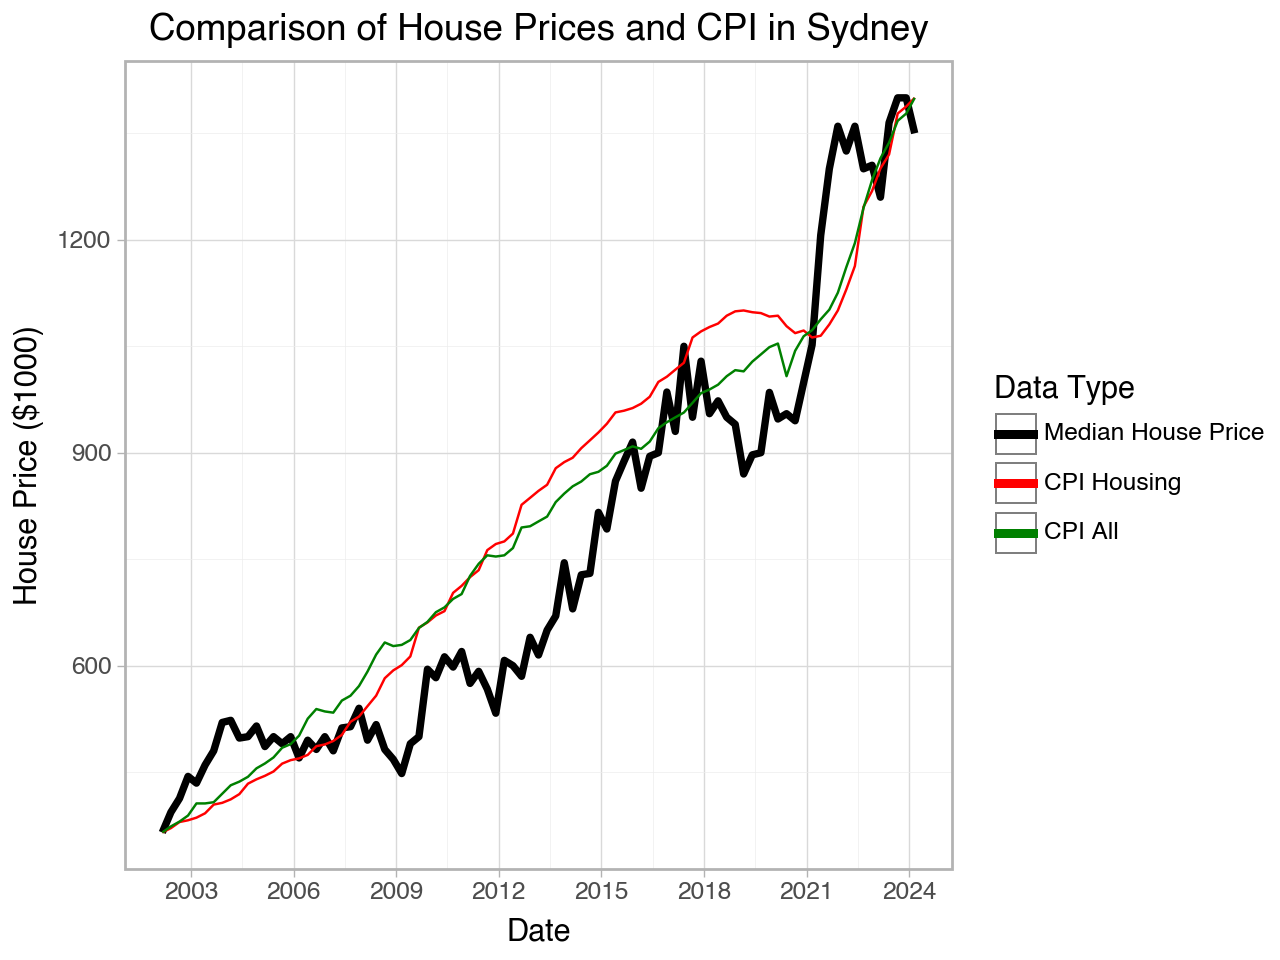

In [16]:
plot.show()

### Comparing current housing prices across states

In [17]:
australia = gpd.read_file('states_and_territories/STE_2021_AUST_GDA2020.shp')
australia.crs = 'epsg:7844'

cities = ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide', 'Canberra', 'Hobart', 'Darwin']
lats = [-33.865143, -37.813629, -27.469771, -31.953512, -34.928499, -35.282001, -42.8821, -12.4637]
longs = [151.209900, 144.963165, 153.025124, 115.857048, 138.600739, 149.128998, 147.3272, 130.8444]
data = {
    'cityname': cities,
    'lats': lats,
    'longs': longs
}

overlay_df = pd.DataFrame(data)
gdf_cities = gpd.GeoDataFrame(overlay_df, geometry=gpd.points_from_xy(overlay_df.longs, overlay_df.lats))
gdf_cities.crs = australia.crs

prices_df = median_prices_df.to_pandas()
current_price_df = prices_df[prices_df['Date'] == prices_df['Date'].max()].iloc[0]
state_price_map = {
    'New South Wales': current_price_df['median_price_sydney'],
    'Victoria': current_price_df['median_price_melbourne'],
    'Queensland': current_price_df['median_price_brisbane'],
    'South Australia': current_price_df['median_price_adelaide'],
    'Western Australia': current_price_df['median_price_perth'],
    'Northern Territory': current_price_df['median_price_darwin'],
    'Tasmania': current_price_df['median_price_hobart'],
    'Australian Capital Territory': current_price_df['median_price_canberra'],
}
australia['median_price'] = australia['STE_NAME21'].apply(lambda x: state_price_map.get(x, None))

fig, ax = plt.subplots(figsize=(12, 10))
australia.plot(ax=ax, column='median_price', cmap='Greens', edgecolor='black')
for idx, row in gdf_cities.iterrows():
    ax.text(row.geometry.x, row.geometry.y, s=row['cityname'], fontsize=8)

ax.set_xlim([australia.total_bounds[0], australia.total_bounds[2]])
ax.set_ylim([australia.total_bounds[1], australia.total_bounds[3]])
plt.axis('off')
plt.title('Comparison of Median House Prices by Capital City')

Text(0.5, 1.0, 'Comparison of Median House Prices by Capital City')

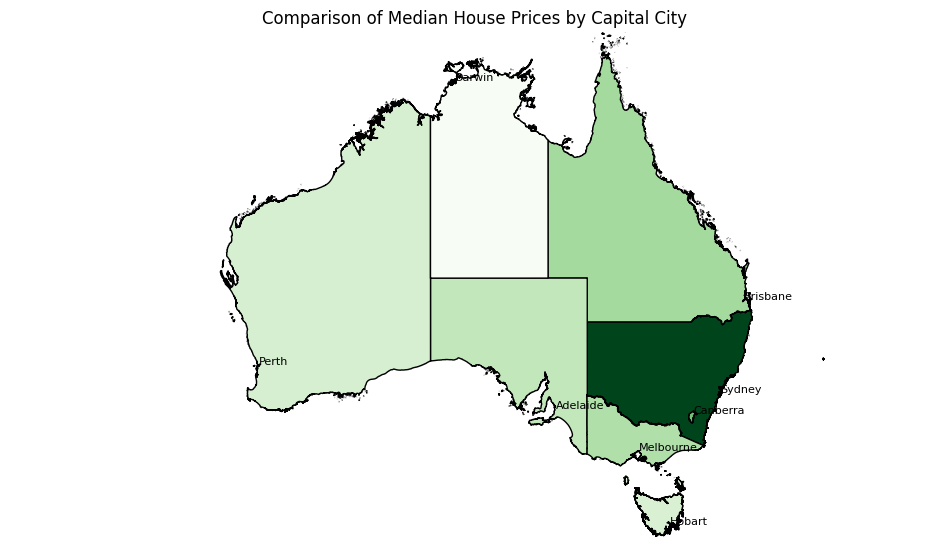

In [18]:
plt.show()

### Comparing housing prices by state over time

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))

def update(year):
    ax.clear()

    current_price_df = prices_df[prices_df['Date'].dt.year == year].iloc[0]
    state_price_map = {
        'New South Wales': current_price_df['median_price_sydney'],
        'Victoria': current_price_df['median_price_melbourne'],
        'Queensland': current_price_df['median_price_brisbane'],
        'South Australia': current_price_df['median_price_adelaide'],
        'Western Australia': current_price_df['median_price_perth'],
        'Northern Territory': current_price_df['median_price_darwin'],
        'Tasmania': current_price_df['median_price_hobart'],
        'Australian Capital Territory': current_price_df['median_price_canberra'],
    }
    australia['median_price'] = australia['STE_NAME21'].apply(lambda x: state_price_map.get(x, None))

    australia.plot(ax=ax, column='median_price', cmap='Greens', edgecolor='black')
    for _, row in gdf_cities.iterrows():
        ax.text(row.geometry.x, row.geometry.y, s=row['cityname'], fontsize=8)
    
    ax.set_title(f'Comparison of Median House Prices by Capital City in {year}')
    ax.set_xlim([australia.total_bounds[0], australia.total_bounds[2]])
    ax.set_ylim([australia.total_bounds[1], australia.total_bounds[3]])
    plt.axis('off')

ani = FuncAnimation(fig, update, frames=prices_df['Date'].dt.year.unique())
ani.save('housing_animation.mp4')

In [25]:
%%HTML
<video width="700" height="500" controls>
  <source src="./housing_animation.mp4" type="video/mp4">
</video>